week 1-2 milestone tasks.

In [1]:
# !pip install ultralytics # if not installed install this

importing required libraries:

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2

In [3]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline
# pip install wandb # if not installed install this
!wandb disabled

W&B disabled.


In [4]:
# Paths to your local directories
Input_path = 'D:\safety gear detection final\css-data'  # my path
Work_path = 'D:\safety gear detection final\results_yolov8n_100e\kaggle\working'   #my path

classes made : 10

In [35]:
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [18]:
# Dictionary for class index
class_idx = {str(i): classes[i] for i in range(num_classes)}

In [19]:
# Update YAML file to include the new classes and number of classes
dict_file = {
    'train': os.path.join(Input_path, 'train'),
    'val': os.path.join(Input_path, 'valid'),
    'test': os.path.join(Input_path, 'test'),
    'nc': num_classes,  # Number of classes
    'names': classes    # Class names
}

In [20]:
# # Save the pdated data to YAML file

file_path = os.path.join(r'D:\safety gear detection final\results_yolov8n_100e\kaggle\working', 'data.yaml')

# Open file and save the updated data to YAML
with open(file_path, 'w') as file:
    yaml.dump(dict_file, file)


In [21]:
# Class statistics and dataset lengths
class_stat = {}
data_len = {}

# Checking for the presence of new classes in the annotations
for mode in ['train', 'valid', 'test']:
    class_count = {classes[i]: 0 for i in range(num_classes)}  # Update class count with new classes
    path = os.path.join(Input_path, mode, 'labels')

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()
            for cls in set([line.split()[0] for line in lines]):  # Class ID is the first character of each line
                class_count[class_idx[cls]] += 1
    
    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

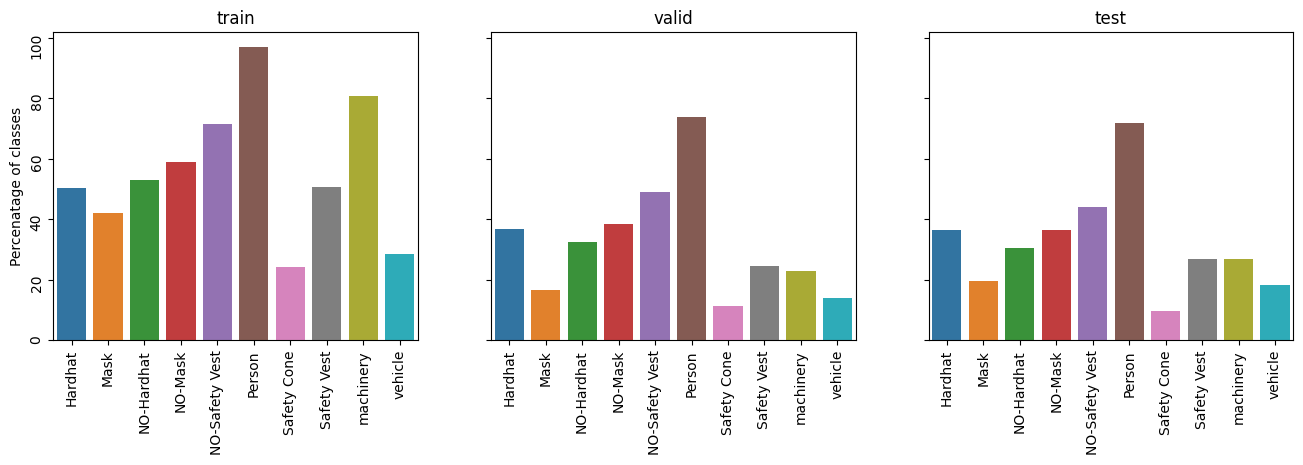

In [33]:
fig, ax = plt.subplots(1,3, figsize=(16, 4), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

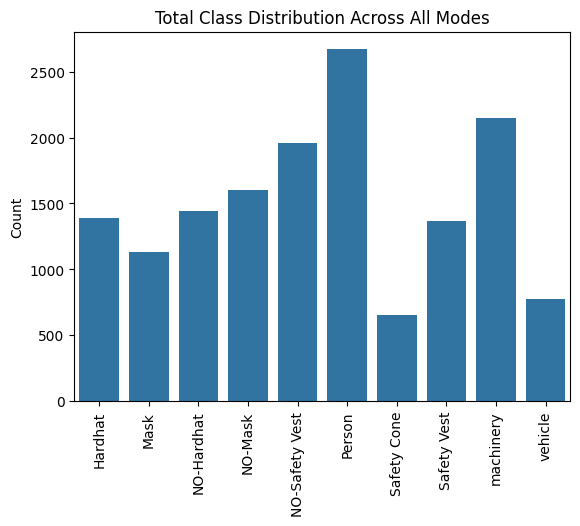

In [34]:
total_class_counts = {cls: sum([class_stat[mode][cls] for mode in ['train', 'valid', 'test']]) for cls in class_stat['train'].keys()}
sns.barplot(x=list(total_class_counts.keys()), y=list(total_class_counts.values()))
plt.title("Total Class Distribution Across All Modes")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()


In [23]:
# Print image sizes in each dataset
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(Input_path, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [24]:
# Print the number of images in each dataset
for mode in ['train', 'valid', 'test']:
    files = glob.glob(os.path.join(Input_path, mode, 'images', '*'))
    print(f'{mode} set size: {len(files)}\n')

train set size: 2605

valid set size: 114

test set size: 82



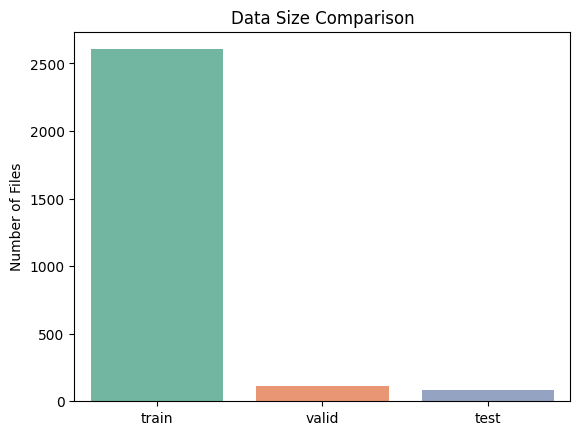

In [29]:
sns.barplot(x=list(data_len.keys()), y=list(data_len.values()), palette='Set2')
plt.title("Data Size Comparison")
plt.ylabel("Number of Files")
plt.show()


In [ ]:
### END OF WEEK 1-2 Tasks